In [ ]:
# Installing the libraries
!pip install -q kaggle scikit-learn matplotlib seaborn opencv-python

import os, sys, random, shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import pathlib
import cv2

print("TF version:", tf.__version__)



In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import zipfile, os

zip_path = "/content/archive(2).zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")


print(os.listdir("/content"))


['.config', 'archive(2) (1).zip', 'seg_pred', 'archive(2).zip', 'seg_train', 'seg_test', 'sample_data']


In [ ]:
DATA_DIR = '/content/seg_train'
if not os.path.exists(DATA_DIR):
    print("Dataset folder not found. Upload the dataset or change DATA_DIR.")
else:
    classes = sorted(os.listdir(DATA_DIR))
    print("Classes:", classes)
    # Count images per class
    for c in classes:
        p = os.path.join(DATA_DIR, c)
        print(c, len(os.listdir(p)))


Classes: ['seg_train']
seg_train 6


In [ ]:
IMG_SIZE = (150,150)
BATCH_SIZE = 32
SEED = 42
EPOCHS = 30
NUM_CLASSES = 6


Train classes: ['seg_train']
Found 11228 images belonging to 1 classes.
Found 2806 images belonging to 1 classes.
Found 3000 images belonging to 1 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


351/351 ━━━━━━━━━━━━━━━━━━━━ 671s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 649s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 651s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 648s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 660s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 665s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


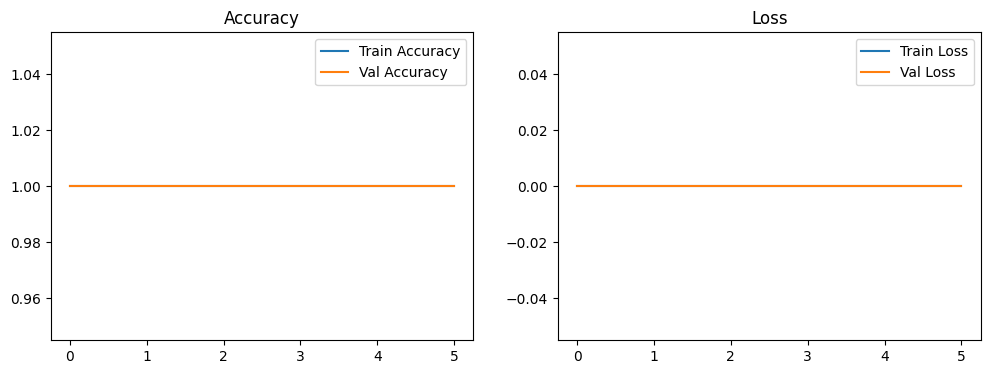

94/94 ━━━━━━━━━━━━━━━━━━━━ 43s 450ms/step - accuracy: 1.0000 - loss: 0.0000e+00
✅ Test Accuracy: 100.00%


In [ ]:

# DATASET PATHS

train_dir = "/content/seg_train"
test_dir = "/content/seg_test"

# Check classes
print("Train classes:", os.listdir(train_dir))


#  IMAGE PREPROCESSING & AUGMENTATION
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,         # 20% validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical",  #ensures one-hot labels
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)


# CNN MODEL

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(train_generator.num_classes, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


# CALLBACKS

early_stop = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)


# TRAINING

EPOCHS = 30
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=[early_stop]
)


# PLOT TRAINING HISTORY

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()


# EVALUATION ON TEST SET

loss, acc = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {acc*100:.2f}%")


In [ ]:
# Confusion matrix and per-class metrics
cm = confusion_matrix(y_true, y_pred)
print("Classification report:")
print(classification_report(y_true, y_pred, target_names=labels, digits=4))

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Visualize sample predictions (10 random images)
def show_preds(generator, y_pred, n=10):
    # generator must have shuffle=False for correct mapping
    idxs = np.random.choice(len(generator.filenames), size=n, replace=False)
    plt.figure(figsize=(16,6))
    for i, idx in enumerate(idxs):
        path = os.path.join(generator.directory, generator.filenames[idx])
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img, IMG_SIZE)
        plt.subplot(2,5,i+1)
        plt.imshow(img_resized)
        true_label = labels[y_true[idx]]
        pred_label = labels[y_pred[idx]]
        title = f"T: {true_label}\nP: {pred_label}"
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_preds(test_generator if test_generator else val_generator, y_pred, n=10)


In [ ]:
# Grad-CAM for interpretation (one example)
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        loss = predictions[:, pred_index]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + 1e-8)
    return heatmap.numpy()

# find last conv layer name
for layer in reversed(model.layers):
    if isinstance(layer, layers.Conv2D):
        last_conv_layer_name = layer.name
        break
print("Last conv layer:", last_conv_layer_name)

# pick a validation image
sample_idx = 0
image_path = os.path.join((test_generator if test_generator else val_generator).directory,
                          (test_generator if test_generator else val_generator).filenames[sample_idx])

img = tf.keras.preprocessing.image.load_img(image_path, target_size=IMG_SIZE)
img_arr = tf.keras.preprocessing.image.img_to_array(img)/255.0
input_arr = np.expand_dims(img_arr, axis=0)

preds = model.predict(input_arr)
pred_class = np.argmax(preds[0])
heatmap = make_gradcam_heatmap(input_arr, model, last_conv_layer_name, pred_index=pred_class)

# overlay heatmap
import matplotlib.cm as cm
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, IMG_SIZE)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:,:3]
jet_heatmap = jet_colors[heatmap]
jet_heatmap = np.uint8(jet_heatmap*255)
superimposed = cv2.addWeighted(img, 0.6, jet_heatmap, 0.4, 0)

plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.imshow(img); plt.title("Original"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(heatmap, cmap='jet'); plt.title("Heatmap"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(superimposed); plt.title("Grad-CAM"); plt.axis('off')
plt.show()
print("Predicted:", labels[pred_class], "Prob:", preds[0][pred_class])


In [ ]:
# Save model and export artifacts
model.save('intel_cnn_model.h5')
# optionally save history, plots, and create a requirements.txt
!pip freeze > requirements.txt
print("Saved model and requirements.txt")
